# Corpus Linguistics for Old Bailey Data

Load packages and data

In [1]:
import pandas as pd
import matplotlib as plt
from collections import defaultdict
%matplotlib inline

In [2]:
datafile="../../voa/OBV2/obv_words_v2_28-01-2017.tsv"
#datafile="worddata.tsv"

alldata=pd.DataFrame.from_csv(datafile,sep='\t')

/Users/juliewe/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Inspect sample of the data

In [3]:
alldata.head()


,sess_date,year,obo_trial,obo_deftid,obc_u_no,obc_event,obc_speaker,obc_sex,obc_hiscoLabel,obc_hiscoCode,obc_class,obc_role,obv_role,words,obv_words_type,words_count,defendant
obv2wid,,,,,,,,,,,,,,,,,
1,17800112,1780,t17800112-1,NaN,1,17800112-1,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"I live at No. 7, in Great Suffolk-street, Char...",s,40,MARY DYER
2,17800112,1780,t17800112-1,NaN,2,17800112-2,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Was that strange woman the prisoner?,q,6,MARY DYER
3,17800112,1780,t17800112-1,NaN,3,17800112-3,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,Yes; she said she only wanted a pint of purl.,a,10,MARY DYER
4,17800112,1780,t17800112-1,NaN,4,17800112-4,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Do you keep a public-house?,q,5,MARY DYER
5,17800112,1780,t17800112-1,NaN,5,17800112-5,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"No, a private house. I sent for a constable, a...",a,16,MARY DYER


Define functions to build corpora according to metadata

In [4]:
alldata['words'].head()

obv2wid
1    I live at No. 7, in Great Suffolk-street, Char...
2                 Was that strange woman the prisoner?
3        Yes; she said she only wanted a pint of purl.
4                          Do you keep a public-house?
5    No, a private house. I sent for a constable, a...
Name: words, dtype: object

In [38]:
restriction=alldata[alldata['obc_sex']=='m']
selection=restriction['words']
selection.head()

obv2wid
1    I live at No. 7, in Great Suffolk-street, Char...
2                 Was that strange woman the prisoner?
3        Yes; she said she only wanted a pint of purl.
4                          Do you keep a public-house?
5    No, a private house. I sent for a constable, a...
Name: words, dtype: object

In [15]:
def make_countdict(alldata):
    countdict={}
    blacklist=['words','obc_hiscoCode']

    for heading in alldata.columns:
        #print('Generating counts for ' +heading)
        if heading not in blacklist:
            countdict[heading]=defaultdict(int)
            selection = alldata[heading]
            for item in selection:
                #print(item)
                countdict[heading][item]+=1
        else:
            #print('skipping')
            pass

    return countdict

countdict=make_countdict(alldata)
    
aheading=alldata.columns[3]
print(countdict[aheading])



defaultdict(<class 'int'>, {nan: 203123, 't17800112-1-defend47': 3, 't17800112-3-defend68': 3, 't17800112-4-defend82': 2, 't17800112-5-defend123': 3, 't17800112-6-defend130': 3, 't17800112-7-defend145': 1, 't17800112-8-defend157': 2, 't17800112-10-defend178': 3, 't17800112-11-defend189': 1, 't17800112-13-defend205': 1, 't17800112-15-defend238': 1, 't17800112-16-defend244': 1, 't17800112-19-defend274': 1, 't17800112-21-defend296': 1, 't17800112-23-defend331': 1, 't17800112-24-defend339': 2, 't17800112-25-defend344': 1, 't17800112-26-defend358': 1, 't17800112-28-defend373': 3, 't17800112-29-defend387': 2, 't17800112-30-defend398': 1, 't17800112-31-defend407': 2, 't17800112-32-defend424': 1, 't17800112-34-defend443': 1, 't17800112-35-defend449': 1, 't17800223-1-defend44': 1, 't17800223-3-defend67': 1, 't17800223-4-defend78': 2, 't17800223-5-defend95': 1, 't17800223-6-defend104': 2, 't17800223-8-defend119': 1, 't17800223-9-defend126': 1, 't17800223-11-defend156': 10, 't17800223-12-defend17

In [7]:
def histogram_values(heading="",column=1):
    if heading=="":
        if column<17:
            heading=alldata.columns[column]
        else:
            print("Column number must be less than 17")
#    print(countdict[heading])
    if heading in countdict.keys():
        countdf=pd.DataFrame.from_dict(countdict[heading],orient='index')
    
        countdf.plot.bar(title=heading,legend=False,figsize=(20,10),fontsize=20)
    else:
        print("No counts stored for "+heading)

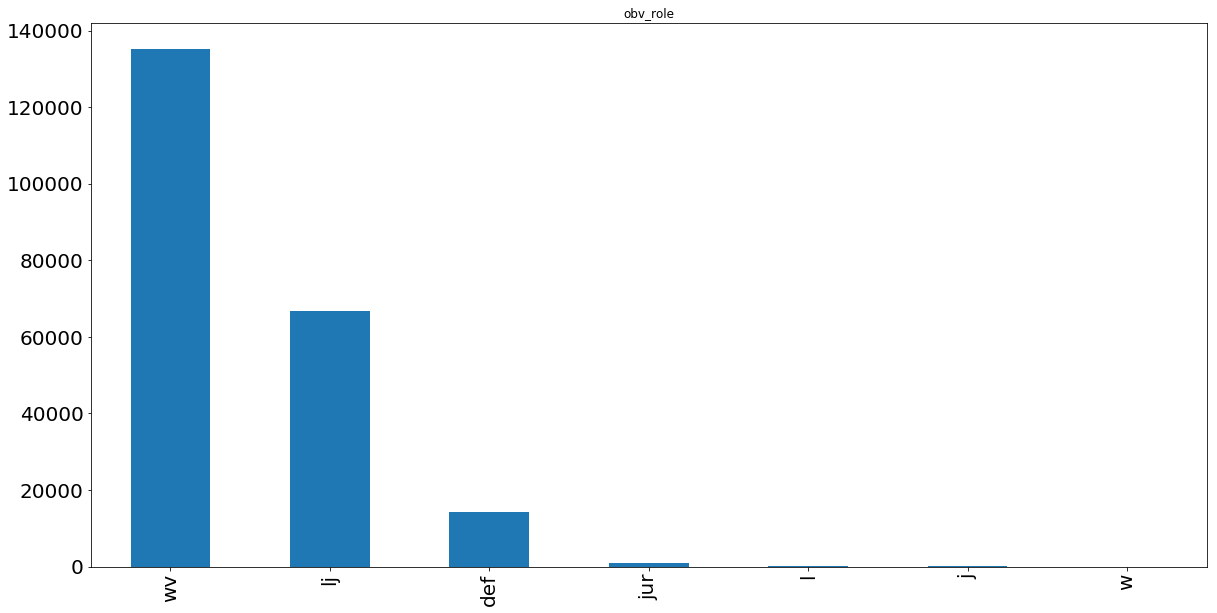

In [43]:
histogram_values(heading='obv_role')

In [57]:
def validated(reqlist,valuedata):
    
    reqdict={}
    for (field,value) in reqlist:
        
        if field in valuedata.keys():
            if value in valuedata[field].keys():
                reqdict[field]=value
                
    return reqdict
            

def build_and_corpus(reqlist,df):
    reqdict=validated(reqlist,make_countdict(df))
    print("Building corpus which satisfies all of the following requirements: "+str(reqdict))
    
    current=df
    for req in reqdict.keys():
        current=current[current[req]==reqdict[req]]
        
    selection=current['words']
    return selection
#print(alldata.columns)    

characteristics=[('obc_sex','f'),('obv_role','wv')]
output_file="corpus"
for (_,characteristic) in characteristics:
    output_file+="_"+characteristic

selection=build_and_corpus(characteristics,alldata)

print(selection)

with open(output_file,"w") as output:
    
    for item in selection:
        output.write(item+"\n")

Building corpus which satisfies all of the following requirements: {'obc_sex': 'f', 'obv_role': 'wv'}
obv2wid
17        I am servant to Mr. Elwell. I was down in the ...
19        The prisoner. I went round the great table whi...
21               Five pair of sheets and three tablecloths.
23                                                     Yes.
25        Yes: it is a large ironing table; I had set it...
27        No, it was on the ground; when she got up I sa...
29                            Upon the middle of the table.
31        She did not seem much in liquor; she said we w...
33                                                      No,
35        No, I had not been out of the kitchen long eno...
37        She was between the table and dresser; it was ...
39        No, they were quite loose, some folded and som...
132       On Sunday the 19th of December, about half aft...
134       Yes. We presently found this noise was made by...
136                                               